In [ ]:
# Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å Ïó∞Í≤∞
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold

# Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
from imblearn.over_sampling import SMOTE

# Î™®Îç∏ ÌèâÍ∞Ä
from sklearn.metrics import roc_auc_score

# Îî•Îü¨Îãù Î™®Îç∏ (TensorFlow)
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

# TensorFlow GPU Í∞ÄÏÜç ÌôïÏù∏
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("‚úÖ GPU Í∞ÄÏÜç ÌôúÏÑ±ÌôîÎê®!")
else:
    print("‚ö†Ô∏è GPUÎ•º Í∞êÏßÄÌï† Ïàò ÏóÜÏäµÎãàÎã§. CPUÏóêÏÑú Ïã§ÌñâÎê©ÎãàÎã§.")

‚úÖ GPU Í∞ÄÏÜç ÌôúÏÑ±ÌôîÎê®!


##### Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è UID Ï≤òÎ¶¨

In [ ]:
train_df = pd.read_csv(r"/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/Data/train.csv")
test_df = pd.read_csv(r"/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/Data/test.csv")

# "UID" Ïª¨Îüº Ïú†ÏßÄ (Ï†úÏ∂ú ÌååÏùºÏö©)
test_uid = test_df[["UID"]]

# "UID" Ïª¨Îüº ÏÇ≠Ï†ú
train_df.drop(columns=["UID"], inplace=True)
test_df.drop(columns=["UID"], inplace=True)

# X, y Î∂ÑÎ¶¨
X = train_df.drop(columns=["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"])
y = train_df["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"]

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/Data/train.csv'

##### Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨ (ÎùºÎ≤® Ïù∏ÏΩîÎî© & Ïõê-Ìï´ Ïù∏ÏΩîÎî©)

In [ ]:
categorical_cols = ["Ï£ºÍ±∞ ÌòïÌÉú", "ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"]

# ÎùºÎ≤® Ïù∏ÏΩîÎî© (ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò)
label_enc = LabelEncoder()
X["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"] = label_enc.fit_transform(X["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"])
test_df["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"] = label_enc.transform(test_df["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"])

# Ïõê-Ìï´ Ïù∏ÏΩîÎî© Ï†ÅÏö©
X = pd.get_dummies(X, columns=["Ï£ºÍ±∞ ÌòïÌÉú", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"], drop_first=False)
test_df = pd.get_dummies(test_df, columns=["Ï£ºÍ±∞ ÌòïÌÉú", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"], drop_first=False)

##### ÏàòÏπòÌòï Î≥ÄÏàò Î≥ÄÌôò (Î°úÍ∑∏ Î≥ÄÌôò Ï†ÅÏö©)

In [ ]:
# Î°úÍ∑∏ Î≥ÄÌôò
log_columns = ["ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°", "Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°", "ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°"]
for col in log_columns:
    X[col] = np.log1p(X[col])
    test_df[col] = np.log1p(test_df[col])

# "ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"Í∞Ä 0Ïù¥Î©¥ "Ïó∞Ï≤¥ ÏóÜÏùå" Ïª¨Îüº Ï∂îÍ∞Ä
X["Ïó∞Ï≤¥ ÏóÜÏùå"] = (X["ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"] == 0).astype(int)
test_df["Ïó∞Ï≤¥ ÏóÜÏùå"] = (test_df["ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"] == 0).astype(int)

##### Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨

In [ ]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
test_imputed = imputer.transform(test_df)

##### Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ (StandardScaler Ï†ÅÏö©)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
test_scaled = scaler.transform(test_imputed)

##### Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (SMOTE Ï†ÅÏö©)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

##### Î™®Îç∏ Ï†ïÏùò / ÌïôÏäµ / ÌèâÍ∞Ä

üîÑ Fold 1 ÏãúÏûë
Epoch 1/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 8ms/step - accuracy: 0.5081 - loss: 0.7300 - val_accuracy: 0.4951 - val_loss: 0.6994
Epoch 2/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5009 - loss: 0.7165 - val_accuracy: 0.4947 - val_loss: 0.6899
Epoch 3/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5035 - loss: 0.7097 - val_accuracy: 0.5049 - val_loss: 0.6837
Epoch 4/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5120 - loss: 0.7015 - val_accuracy: 0.5209 - val_loss: 0.6789
Epoch 5/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5301 - loss: 0.6940 - val_accuracy: 0.5542 - val_loss: 0.6747
Epoch 6/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5260 - loss: 0.6931 - val_acc

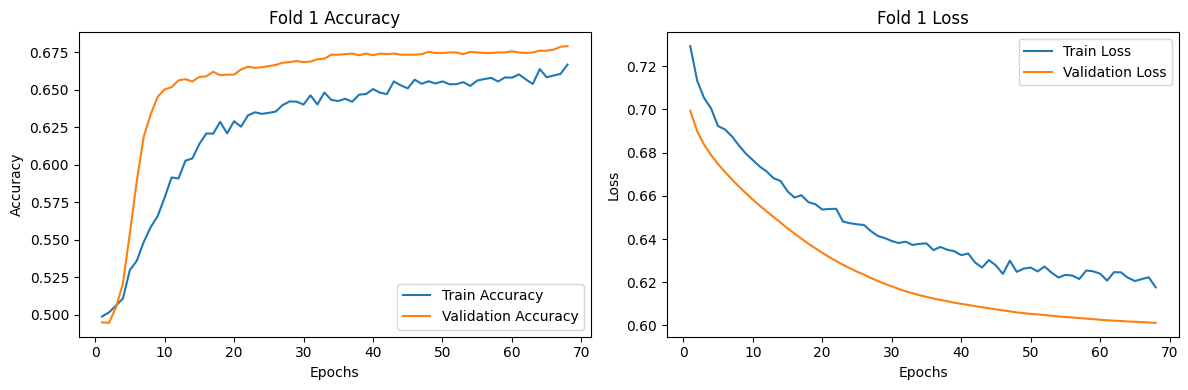

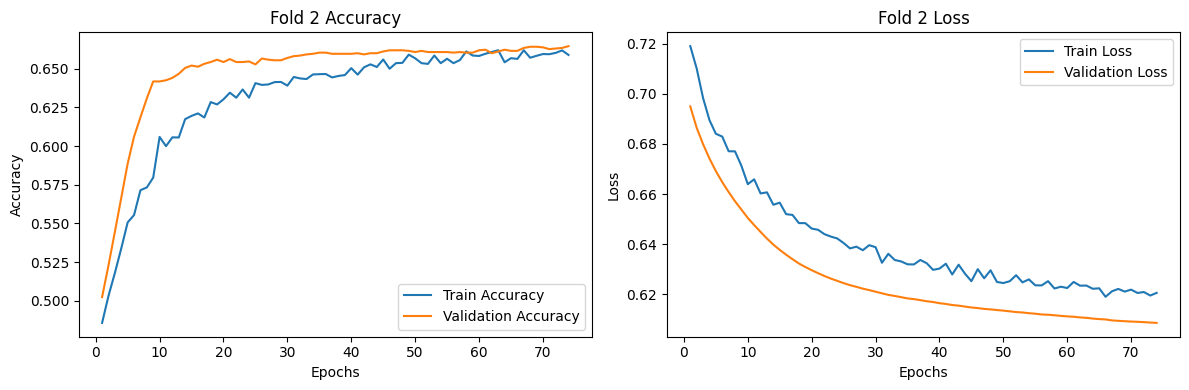

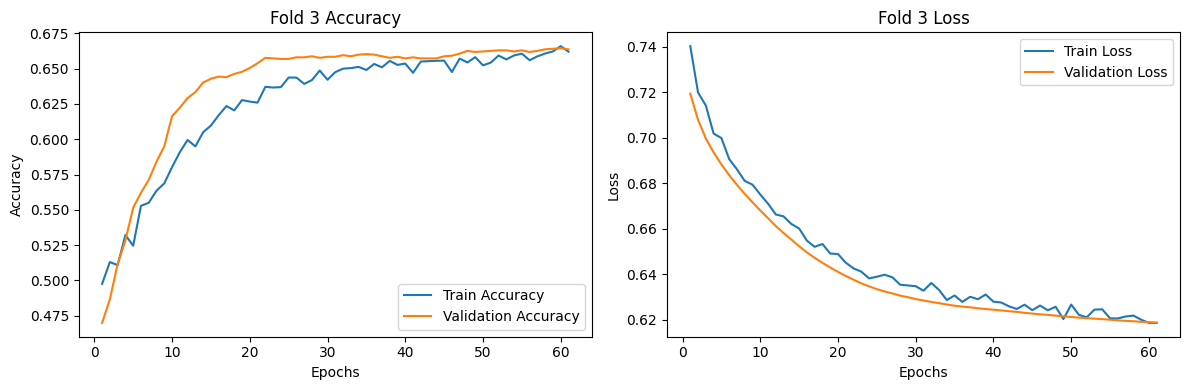

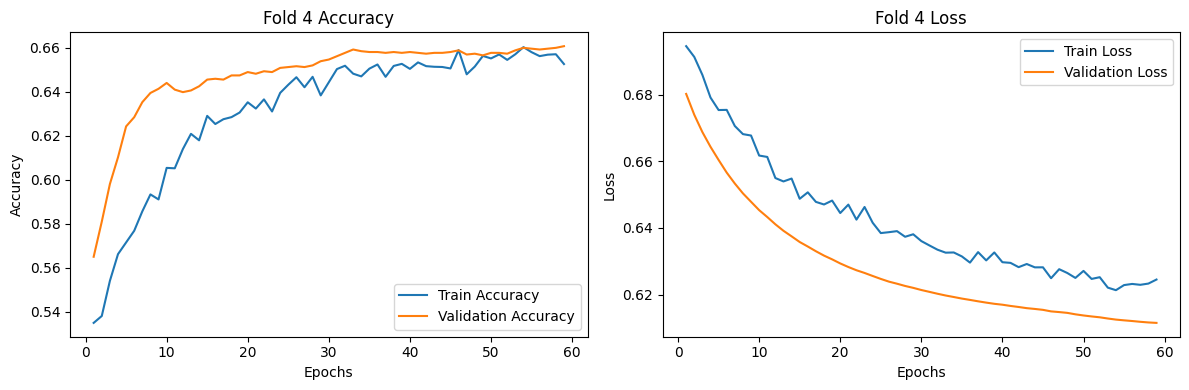

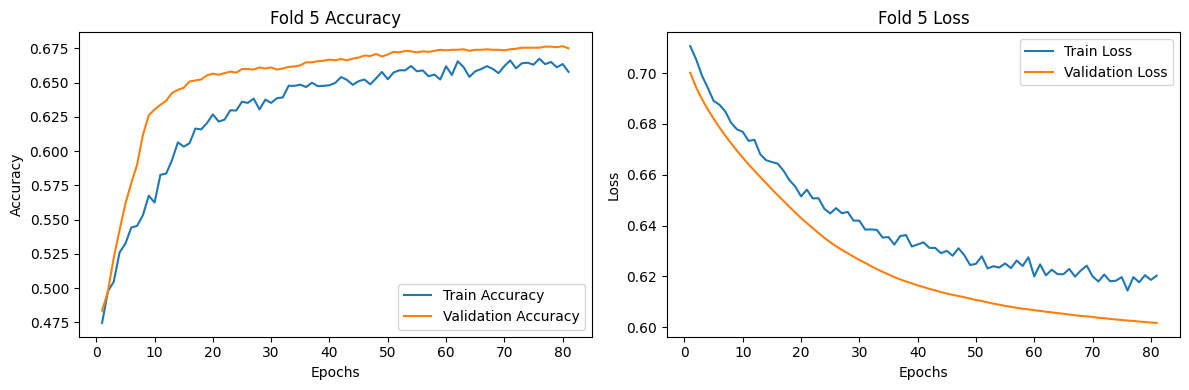

In [ ]:
# FoldÎ≥Ñ AccuracyÏôÄ Loss Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
all_history = []  # Ïù¥ Ï§ÑÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ all_historyÎ•º Î™ÖÌôïÌûà Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
roc_auc_scores = []

for train_index, valid_index in kf.split(X_resampled):
    print(f"üîÑ Fold {fold} ÏãúÏûë")

    # ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    X_train_fold, X_valid_fold = X_resampled[train_index], X_resampled[valid_index]
    y_train_fold, y_valid_fold = y_resampled[train_index], y_resampled[valid_index]

    # Î™®Îç∏ Ï†ïÏùò
    model = keras.Sequential([
        keras.layers.Dense(128, activation="relu", input_shape=(X_train_fold.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    # Î™®Îç∏ Ïª¥ÌååÏùº
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Ï°∞Í∏∞ Ï¢ÖÎ£å ÏΩúÎ∞± ÏÑ§Ï†ï
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        min_delta=0.001,
        restore_best_weights=True
    )

    # Î™®Îç∏ ÌïôÏäµ
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_valid_fold, y_valid_fold),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # FoldÏùò ÌïôÏäµ Í≤∞Í≥º Ï†ÄÏû•
    all_history.append(history.history)  # FoldÎ≥Ñ ÌïôÏäµ Í≤∞Í≥º Ï†ÄÏû•

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
    y_valid_pred = model.predict(X_valid_fold).flatten()
    roc_auc = roc_auc_score(y_valid_fold, y_valid_pred)
    print(f"Fold {fold} Validation ROC-AUC: {roc_auc:.4f}")
    roc_auc_scores.append(roc_auc)
    fold += 1

# ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† ROC-AUC: {np.mean(roc_auc_scores):.4f}")

# ÏãúÍ∞ÅÌôî: FoldÎ≥Ñ AccuracyÏôÄ Loss
for i, history in enumerate(all_history):
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 4))

    # Accuracy ÏãúÍ∞ÅÌôî
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i + 1} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss ÏãúÍ∞ÅÌôî
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i + 1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

##### Î™®Îç∏ ÌÜµÏß∏Î°ú Ï†ÄÏû•

In [ ]:
model.save(r"/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/model_info/my_model.keras")

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = keras.models.load_model(r"/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/model_info/my_model.keras")

##### ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (ÌôïÎ•† ÏòàÏ∏°)

In [ ]:
y_test_pred = model.predict(test_scaled).flatten()  # ÌôïÎ•† Í∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

# Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = pd.DataFrame({
    "UID": test_uid["UID"],
    "Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÌôïÎ•†": y_test_pred  # ÌôïÎ•†Í∞íÏùÑ Í∑∏ÎåÄÎ°ú Ï†ÄÏû•
})

# CSV Ï†ÄÏû•
submission.to_csv(r"/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/Data/submission_17th.csv", index=False)

print("‚úÖ Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å! 'submission_17th.csv' Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

65/65 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step
‚úÖ Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å! 'submission_17th.csv' Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [ ]:
# Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Îêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÖã Ï†ÄÏû•
test_scaled_df = pd.DataFrame(test_scaled)
test_scaled_df.columns = X.columns
test_scaled_df.to_csv(r"/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/Data/test_scaled.csv", index=False)

#### LIME ÎèÑÏûÖ

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏
!pip install lime
from lime.lime_tabular import LimeTabularExplainer
from tqdm.auto import tqdm
from tqdm.notebook import tqdm

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Í≤∞Í≥º csv ÌååÏùº
submission_df = pd.read_csv(r"/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/Data/submission_17th.csv")

In [ ]:
# LIME ÏÑ§Î™ÖÍ∏∞ ÏÉùÏÑ±
explainer = LimeTabularExplainer(
    training_data=test_scaled_df.values,
    feature_names=test_scaled_df.columns,
    class_names=["0", "1"],  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÏßÄÏ†ï
    mode="classification"  #
)

In [ ]:
# Î™®Îç∏Ïùò predict Î©îÏÑúÎìúÎ•º ÏàòÏ†ïÌïòÏó¨ Îëê ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•†ÏùÑ Î™®Îëê Î∞òÌôòÌïòÎèÑÎ°ù Ìï®.
def predict_proba(X):
    preds = model.predict(X)
    return np.column_stack([1 - preds, preds])

# ÏßÑÌñâ ÏÉÅÌô©ÏùÑ ÌëúÏãúÌï† progress bar ÏÉùÏÑ±
total_instances = len(test_scaled_df)
progress_bar = tqdm(total=total_instances, desc="LIME Ï≤òÎ¶¨ Ï§ë")

# Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÏÑ§Î™Ö ÏÉùÏÑ±
all_lime_results = []

for idx in range(total_instances):
    explanation = explainer.explain_instance(
        data_row=test_scaled_df.iloc[idx].values,
        predict_fn=predict_proba,
        num_features=5
    )
    lime_results = explanation.as_list()
    lime_df = pd.DataFrame(lime_results, columns=["Feature", "Weight"])
    lime_df["Instance_ID"] = submission_df.loc[idx, "UID"]
    all_lime_results.append(lime_df)

    # Progress bar ÏóÖÎç∞Ïù¥Ìä∏
    progress_bar.update(1)

# Progress bar Ï¢ÖÎ£å
progress_bar.close()

# ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í≤∞Ìï©
final_lime_df = pd.concat(all_lime_results, ignore_index=True)

LIME Ï≤òÎ¶¨ Ï§ë:   0%|          | 0/2062 [00:00<?, ?it/s]

157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
# Ï†ÄÏû•
final_lime_df.to_csv(r"/content/drive/MyDrive/FISA_·ÑÄ·Öµ·Ñâ·ÖÆ·ÜØ·Ñâ·Ö¶·ÑÜ·Öµ·ÑÇ·Ö°/Data/lime_df_column5.csv", index=False)

In [ ]:
final_lime_df[final_lime_df['Instance_ID'] == 'TEST_0008']
# Feature: Î™®Îç∏Ïù¥ ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìïú ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏ†ï ÌäπÏÑ±
# Weight: Ìï¥Îãπ ÌäπÏÑ±Ïù¥ Î™®Îç∏ ÏòàÏ∏°Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïùò ÌÅ¨Í∏∞ÏôÄ Î∞©Ìñ•ÏùÑ ÎÇòÌÉÄÎÉÑ.
    ## ÏñëÏàò(+) Í∞í: Ìï¥Îãπ ÌäπÏÑ±Ïù¥ ÌòÑÏû¨ ÏòàÏ∏° ÌÅ¥ÎûòÏä§(Ïòà: "1")Î•º ÏßÄÏßÄÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®.
    ## ÏùåÏàò(-) Í∞í: Ìï¥Îãπ ÌäπÏÑ±Ïù¥ Î∞òÎåÄ ÌÅ¥ÎûòÏä§(Ïòà: "0")Î•º ÏßÄÏßÄÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®.

Feature    Weight Instance_ID
40     ÎåÄÏ∂ú Î™©Ï†Å_ÏùòÎ£åÎπÑ <= -0.13  0.218725   TEST_0008
41  ÎåÄÏ∂ú Î™©Ï†Å_ÏûêÎèôÏ∞® Íµ¨Îß§ <= -0.10  0.188882   TEST_0008
42        ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ > -0.08 -0.160020   TEST_0008
43      Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò > 0.38  0.136068   TEST_0008
44  ÎåÄÏ∂ú Î™©Ï†Å_Ï£ºÌÉù Í∞úÎ≥¥Ïàò <= -0.32  0.098465   TEST_0008

In [ ]:
submission_df.loc[submission_df['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÌôïÎ•†'].idxmin()]

UID          TEST_0008
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÌôïÎ•†          0.0
Name: 8, dtype: object